In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Forecasting weekly COVID-19 deaths 6 weeks into the future

The goal of this problem is to estimate weekly covid-19 deaths using Google Trends data.

In [2]:
# load covid data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/covid_data.csv'
data = pd.read_csv(url,index_col='date',parse_dates=True)
data

,weekly_deaths,weekly_google_searches
date,,
2020-11-15,8035.0,51.0
2020-11-22,10513.0,45.0
2020-11-29,10160.0,49.0
2020-12-06,15558.0,51.0
2020-12-13,17019.0,48.0
...,...,...
2022-01-02,9450.0,23.0
2022-01-09,11887.0,29.0
2022-01-16,13781.0,28.0


**Data Description**

| Feature | Description |
| :- | -: |
| weekly_deaths |  weekly number of new reported COVID-19 deaths in the US in the period Nov 2020–Jan 2022  |
| weekly_google_searches |  Google searches of the term “COVID symptoms”. |

**Remark 1:** [Google Trends](https://trends.google.com/trends/?geo=US) normalizes the search counts by dividing the count for each query in
a particular week by the total number of online search queries submitted in that location during the
week. Then, the values are adjusted to be between 0 and 100.

**Remark 2:** I have shifted the search counts 6 weeks ahead.
For example, row 1 says

In [3]:
data.head(1) # display first row

,weekly_deaths,weekly_google_searches
date,,
2020-11-15,8035.0,51.0


that the weekly number of covid deaths on the week that ended on November 15 were 8035, and that the search counts on the week that ended on October 4 (this is, 6 weeks into the past) were 51.

## Part 1

Fit a linear regression model to predict the `weekly_deaths` variable using the `weekly_google_searches` variable.

In [4]:
# your code here
x= data.weekly_google_searches.to_numpy().reshape((-1,1))
y= data.weekly_deaths.to_numpy().reshape((-1,1))

In [5]:
theta=np.linalg.lstsq(x,y)[0]

C:\Users\sebas\AppData\Local\Temp/ipykernel_13960/3900398492.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta=np.linalg.lstsq(x,y)[0]


## Part 2

Compute the predicted number of deaths (that is, compute the `y_pred` vector).

In [6]:
# your code here
y_pred=x.dot(theta)

The code below will assign the `y_pred` vector to a column named `prediction`

In [7]:
data['prediction'] = y_pred

Plot the actual and predicted deaths. 

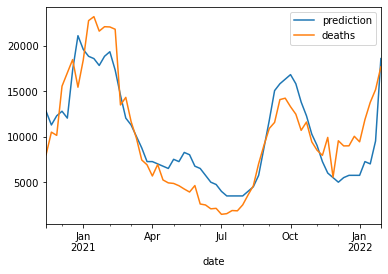

In [8]:
# your code here
data['prediction'].plot(label='prediction')
data['weekly_deaths'].plot(label='deaths')
plt.legend()

**Part 3:**

In [9]:
# load data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/covid_data_last7weeks.csv'
data_next = pd.read_csv(url,index_col='date',parse_dates=True)
data_next

,weekly_google_searches
date,
2022-01-30,74.0
2022-02-06,100.0
2022-02-13,94.0
2022-02-20,77.0
2022-02-27,55.0
2022-03-06,36.0
2022-03-13,25.0


In [14]:
data.tail()

,weekly_deaths,weekly_google_searches,prediction
date,,,
2022-01-02,9450.0,23.0,5775.702500
2022-01-09,11887.0,29.0,7282.407499
2022-01-16,13781.0,28.0,7031.289999
2022-01-23,15178.0,38.0,9542.464999
2022-01-30,17683.0,74.0,18582.694999


The `data_next` dataframe contains the search counts data for the last 7 weeks. Use this data to predict the number of covid deaths. 
Assign the predictions to a vector named `y_pred_next`.

In [10]:

# your code here
x= data_next.weekly_google_searches.to_numpy().reshape((-1,1))

In [11]:
# your code here
y_pred_next=x.dot(theta)

The code below will assign the `y_pred_next` vector to a column named `forecast`.

In [12]:
data_next['forecast'] = y_pred_next


                           uuuuuuuuuuuuuuuuuuRun the cell below to see the actual and predicted number of covid deaths, and the number of covid deaths forecasted for the following 6 weeks.

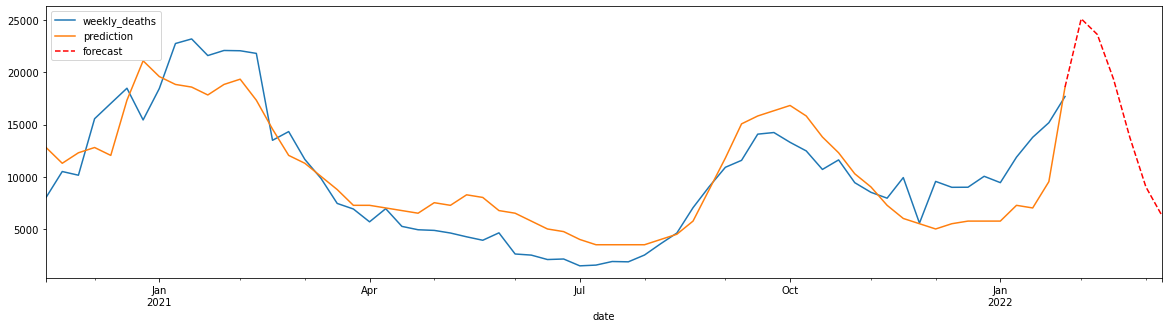

In [13]:
data[['weekly_deaths','prediction']].plot(figsize=(20,5))
data_next['forecast'].plot(c='red', style='--',label='forecast')
plt.legend()